## N:B everything is coded using numpy and mathematics no Tensorflow or Pytorch

#### The first neural network is designed to predict insurance eligibility.
#### It takes two input features: age and affordability, corresponding to two input neurons.
#### The network has no hidden layer—only a single output neuron.
#### The sigmoid activation function is used for the output.
#### Gradient descent is implemented manually for weight updates, and cross-entropy loss is used as the cost function.


#### The second neural network is built to predict handwritten digits.
#### The input to the model is a 1D array of 784 pixels (28x28 images flattened).
#### The network consists of an input layer with 784 neurons, a hidden layer with 128 neurons, and an output layer with 10 neurons (representing digits 0–9).
#### All functions, including activation, forward and backward propagation, and loss calculation, are implemented from scratch.
#### Gradient descent is used for updating weights in both the output and hidden layers.


#### importing libraries that we will need 

In [120]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [122]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Bureau\ML_Projects\Gradient_descent\insurance_data (2).csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


##### dividing data into trainnig and testing 

In [124]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df[["age" , "affordibility"]] , df["bought_insurance"], test_size = 0.25)

In [126]:
len(X_train)

21

In [128]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

##### scaling the age i took 100 years as a standard

In [333]:
X_train_scaled["age"] = X_train["age"] / 100
X_test_scaled["age"] = X_test["age"] / 100


In [335]:
type(X_train_scaled)

pandas.core.frame.DataFrame

In [37]:
X_train_scaled.shape

(21, 2)

In [57]:
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)

##### sigmoid function for the activations of the neurons and the non linearity values between 0 and 1

In [337]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

##### sigmoid function for the activations of the neurons and the non linearity values between 0 and 1 but this one can take an array as an input

In [339]:
def sigmoid_np(X):
    return 1 / (1 + np.exp(-X))


print(sigmoid_np(np.array([3,2,1,5])))

[0.95257413 0.88079708 0.73105858 0.99330715]


In [341]:
print(sigmoid_np(np.array([3.7 , 5 , 12])))

[0.97587298 0.99330715 0.99999386]


##### cross_entopy_loss function for binary prediction

In [343]:
def log_loss(y_true , y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new) + (1-y_true)*np.log(1-y_predicted_new))



In [345]:
print(log_loss(np.array([1,1,1,1]) ,np.array([1,1,1,0]) ))

8.634694098727671


##### gradient descent logic implementation

In [523]:
def gradient_descent(age , affordability , y_true , learning_rate , epochs ):
    n = len(age)
    w1 = 1
    w2 = 1
    b = 0

    for epoch in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + b  # forward propagation linear function
        result = sigmoid_np(weighted_sum)                 # introducing the non linearity and claping values between 0-1
        loss = log_loss(y_true , result)                  # the cost function 

        error = result - y_true
        w1d = (1/n) * np.dot(age.T , error)               # updating the weight using the derivative ( chain rule)
        w2d = (1/n) * np.dot(affordability.T , error)     
        bias_d = np.mean(error)                           # udating the bias

        w1 -= learning_rate * w1d                         # updating the weights
        w2 -= learning_rate * w2d
        b -= learning_rate * bias_d                       # updating the bias

        print(f"epoch: {epoch}, w1: {w1:.4f}, w2: {w2:.4f}, b: {b:.4f}, loss: {loss:.4f}")

        #if loss <= threshold:
         #   break

    return w1 , w2 , b


In [238]:
gradient_descent(X_train_scaled["age"] , X_train["affordibility"] , y_train , 0.05 , 3000 )

epoch: 0, w1: 0.9997, w2: 0.9973, b: -0.0062, loss: 0.6011
epoch: 1, w1: 0.9994, w2: 0.9946, b: -0.0123, loss: 0.6002
epoch: 2, w1: 0.9992, w2: 0.9919, b: -0.0184, loss: 0.5993
epoch: 3, w1: 0.9990, w2: 0.9893, b: -0.0244, loss: 0.5984
epoch: 4, w1: 0.9988, w2: 0.9868, b: -0.0303, loss: 0.5976
epoch: 5, w1: 0.9987, w2: 0.9843, b: -0.0362, loss: 0.5968
epoch: 6, w1: 0.9985, w2: 0.9819, b: -0.0420, loss: 0.5960
epoch: 7, w1: 0.9984, w2: 0.9795, b: -0.0477, loss: 0.5952
epoch: 8, w1: 0.9984, w2: 0.9771, b: -0.0533, loss: 0.5944
epoch: 9, w1: 0.9983, w2: 0.9748, b: -0.0589, loss: 0.5937
epoch: 10, w1: 0.9983, w2: 0.9725, b: -0.0644, loss: 0.5929
epoch: 11, w1: 0.9983, w2: 0.9703, b: -0.0699, loss: 0.5922
epoch: 12, w1: 0.9983, w2: 0.9682, b: -0.0753, loss: 0.5915
epoch: 13, w1: 0.9984, w2: 0.9660, b: -0.0806, loss: 0.5909
epoch: 14, w1: 0.9985, w2: 0.9639, b: -0.0859, loss: 0.5902
epoch: 15, w1: 0.9986, w2: 0.9619, b: -0.0911, loss: 0.5896
epoch: 16, w1: 0.9987, w2: 0.9599, b: -0.0962, los

(5.110117658508835, 1.0063806980515506, -2.214970782591684)

####  w1 an w2 that i got 

In [170]:
w1 = 2.8601314930417936
w2 = 1.1451444937084765
b = -1.4044790444754405

In [349]:
def prediction(age , affordibility):
    age = age/100
    weighted_sum = w1*age + w2*affordibility + b
    result = sigmoid(weighted_sum)
    if result > 0.5:
        return 1
    else :
        return 0

In [190]:
prediction(22,1)

1

In [351]:
def prediction_array(age , affordibility):
    age = np.array(age)
    affordibility = np.array(affordibility)
    age = age / 100
    weighted_sum = w1*age + w2*affordibility + b
    result = sigmoid_np(weighted_sum)
    predicted_values = (result > 0.5).astype(int)
    return predicted_values

In [230]:
prediction_array([22,25,47] , [1 , 0, 1])

array([1, 0, 1])

##### group all these functions in one class

In [353]:
class MyNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.b = 0

    def fit(self , x_train , y_train , epochs):
        self.w1 , self.w2 ,self.b = self.gradient_descent(x_train["age"] , x_train["affordibility"],y_train , epochs)

    def predict(self , age , affordibility):
        age = age /100
        weighted_sum = self.w1*age + self.w2*affordibility +self.b
        weighted_sum = sigmoid(weighted_sum)
        if weighted_sum > 0.5:
            return 1
    
        else :
            return 0

    def predict_np(self, x_test):
        age = x_test["age"]
        affordibility = x_test["affordibility"]
        age = np.array(age)
        affordibility = np.array(affordibility)
        weighted_sum = self.w1 * age + self.w2 * affordibility + self.b
        probabilities = sigmoid_np(weighted_sum)
        predicted_values = (probabilities > 0.5).astype(int)
        return predicted_values
        
        
    
    def gradient_descent(self , age , affordibility , y_true , epochs ):
        n = len(age)
        w1 = 1
        w2 = 1
        b = 0
        learning_rate = 0.5
        
        for epoch in range(epochs):
            weighted_sum = w1 * age + w2 * affordibility + b
            result = sigmoid_np(weighted_sum)
            loss = log_loss(y_true , result)
            
            error = result - y_true
            w1d = (1/n) * np.dot(age.T , error)
            w2d = (1/n) * np.dot(affordibility.T , error)
            bias_d = np.mean(error)
            
            w1 -= learning_rate * w1d
            w2 -= learning_rate * w2d
            b -= learning_rate * bias_d
            
            print(f"epoch: {epoch}, w1: {w1:.4f}, w2: {w2:.4f}, b: {b:.4f}, loss: {loss:.4f}")
            
                    #if loss <= threshold:
                     #   break
        
        return w1 , w2 , b


##### training the model 3000 epochs and lerning rate is 0.5

In [355]:
custom_model = MyNN()
custom_model.fit(X_train_scaled , y_train , 3000)

epoch: 0, w1: 0.9970, w2: 0.9726, b: -0.0621, loss: 0.6011
epoch: 1, w1: 0.9970, w2: 0.9503, b: -0.1168, loss: 0.5925
epoch: 2, w1: 0.9996, w2: 0.9326, b: -0.1651, loss: 0.5860
epoch: 3, w1: 1.0045, w2: 0.9189, b: -0.2077, loss: 0.5810
epoch: 4, w1: 1.0114, w2: 0.9087, b: -0.2454, loss: 0.5772
epoch: 5, w1: 1.0200, w2: 0.9013, b: -0.2789, loss: 0.5742
epoch: 6, w1: 1.0300, w2: 0.8964, b: -0.3088, loss: 0.5718
epoch: 7, w1: 1.0411, w2: 0.8936, b: -0.3357, loss: 0.5699
epoch: 8, w1: 1.0533, w2: 0.8925, b: -0.3601, loss: 0.5682
epoch: 9, w1: 1.0663, w2: 0.8928, b: -0.3824, loss: 0.5668
epoch: 10, w1: 1.0800, w2: 0.8942, b: -0.4029, loss: 0.5655
epoch: 11, w1: 1.0942, w2: 0.8965, b: -0.4219, loss: 0.5643
epoch: 12, w1: 1.1089, w2: 0.8995, b: -0.4396, loss: 0.5632
epoch: 13, w1: 1.1240, w2: 0.9032, b: -0.4563, loss: 0.5621
epoch: 14, w1: 1.1394, w2: 0.9073, b: -0.4721, loss: 0.5611
epoch: 15, w1: 1.1550, w2: 0.9117, b: -0.4872, loss: 0.5601
epoch: 16, w1: 1.1709, w2: 0.9164, b: -0.5017, los

In [357]:
custom_model.predict(25,0)

0

In [359]:
custom_model.predict_np(X_test_scaled)

array([1, 1, 0, 0, 0, 0, 1])

##### we can notice that the model is making good prdictions except 2 samples wrong

In [361]:
y_test

6     0
25    1
26    0
10    0
21    0
20    0
3     0
Name: bought_insurance, dtype: int64

In [304]:
X_test_scaled

,age,affordibility
6,0.55,0
25,0.54,1
26,0.23,1
10,0.18,1
21,0.26,0
20,0.21,1
3,0.52,0


### The 2nd neural network principal neural network

##### loadind the mnist data

In [367]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [369]:
len(X_train)

60000

In [371]:
len(X_test)

10000

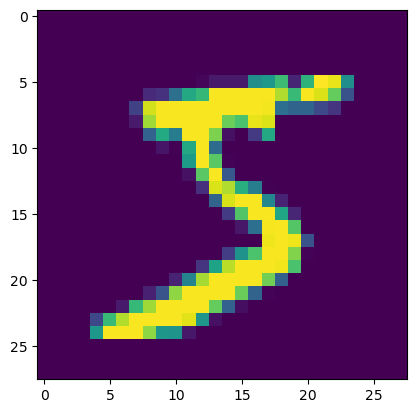

In [373]:
plt.imshow(X_train[0])
plt.show()

In [375]:
y_train[0]

5

In [379]:
X_train.shape

(60000, 28, 28)

In [381]:
28*28

784

#### the neural network for the mnist with relu for the hidden layer ot's better for the non linearity

In [542]:


def relu(x):
    return np.maximum(0, x)

def relu_derivatives(x):           # relu_derivative for the backward propagation
    return (x > 0).astype(float)

def softmax(x):                    # softmax for the output layer it gives probabilities and with the cross_entropy_loss it help in the backward 
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # stability fix
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):    # cross_entropy_loss for the multi classification
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

class MyNN:
    def __init__(self, input_layer=784, hidden_layer=128, output_layer=10, learning_rate=0.001):  # initilizing the weights and biases for the hidden and output layer
        self.lr = learning_rate
        self.W1 = np.random.randn(input_layer, hidden_layer) * 0.01
        self.b1 = np.zeros((1, hidden_layer))
        self.W2 = np.random.randn(hidden_layer, output_layer) * 0.01
        self.b2 = np.zeros((1, output_layer))

    def forward_propagation(self, X):             
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward_propagation(self, X, y_true):
        m = X.shape[0]
        dZ2 = self.A2 - y_true
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivatives(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def fit(self, X, y, epochs=200):
        for epoch in range(epochs):
            y_pred = self.forward_propagation(X)
            loss = cross_entropy_loss(y, y_pred)
            self.backward_propagation(X, y)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X_test):
        y_pred = self.forward_propagation(X_test)
        return np.argmax(y_pred, axis=1)

    def evaluate(self, X, y_true_labels):
        y_pred_labels = self.predict(X)
        
        # If y_true_labels is one-hot, convert to class indices:
        if y_true_labels.ndim == 2 and y_true_labels.shape[1] > 1:
            y_true_labels = np.argmax(y_true_labels, axis=1)
        
        accuracy = np.mean(y_pred_labels == y_true_labels)
        print(f"Accuracy: {accuracy:.4f}")
        return accuracy



##### using fetch_epnml we don't need to reshape the array it's alredy flattened

In [407]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data / 255.0  # Normalize
y = mnist.target.astype(int)

##### encod the labels 

In [409]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

In [411]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X , y_encoded ,test_size = 0.2 , random_state = 42)


In [445]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [449]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [451]:
model.predict(X_test[0])

array([0], dtype=int64)

In [443]:
model = MyNN()
model.fit(X_train , y_train)

Epoch 1/200, Loss: 2.3021
Epoch 2/200, Loss: 2.3020
Epoch 3/200, Loss: 2.3020
Epoch 4/200, Loss: 2.3020
Epoch 5/200, Loss: 2.3020
Epoch 6/200, Loss: 2.3020
Epoch 7/200, Loss: 2.3020
Epoch 8/200, Loss: 2.3020
Epoch 9/200, Loss: 2.3020
Epoch 10/200, Loss: 2.3019
Epoch 11/200, Loss: 2.3019
Epoch 12/200, Loss: 2.3019
Epoch 13/200, Loss: 2.3019
Epoch 14/200, Loss: 2.3019
Epoch 15/200, Loss: 2.3019
Epoch 16/200, Loss: 2.3019
Epoch 17/200, Loss: 2.3019
Epoch 18/200, Loss: 2.3019
Epoch 19/200, Loss: 2.3018
Epoch 20/200, Loss: 2.3018
Epoch 21/200, Loss: 2.3018
Epoch 22/200, Loss: 2.3018
Epoch 23/200, Loss: 2.3018
Epoch 24/200, Loss: 2.3018
Epoch 25/200, Loss: 2.3018
Epoch 26/200, Loss: 2.3018
Epoch 27/200, Loss: 2.3017
Epoch 28/200, Loss: 2.3017
Epoch 29/200, Loss: 2.3017
Epoch 30/200, Loss: 2.3017
Epoch 31/200, Loss: 2.3017
Epoch 32/200, Loss: 2.3017
Epoch 33/200, Loss: 2.3017
Epoch 34/200, Loss: 2.3017
Epoch 35/200, Loss: 2.3017
Epoch 36/200, Loss: 2.3016
Epoch 37/200, Loss: 2.3016
Epoch 38/2

## We got a very low so we need to do some other preprocessing 

In [447]:
model.evaluate(X_test , y_test)

Accuracy: 0.2096


0.20957142857142858

### this is the corrected version i added :
##### I applied He initialization to the weights, which helps improve the performance of ReLU activation functions by maintaining appropriate variance in each layer. This helps prevent vanishing or exploding gradients during training.

##### I used mini-batch gradient descent instead of full-batch training to reduce computational load and improve training efficiency. Mini-batches make updates more frequent and typically result in faster convergence.

In [453]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import time

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1.0, 0.0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Loss function
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# One-hot encoding
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

class MyNN:
    def __init__(self, input_layer=784, hidden_layer=128, output_layer=10, learning_rate=0.01):
        self.lr = learning_rate
        # He initialization
        self.W1 = np.random.randn(input_layer, hidden_layer) * np.sqrt(2.0 / input_layer)
        self.b1 = np.zeros((1, hidden_layer))
        self.W2 = np.random.randn(hidden_layer, output_layer) * np.sqrt(2.0 / hidden_layer)
        self.b2 = np.zeros((1, output_layer))

    def forward_propagation(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward_propagation(self, X, y_true):
        m = X.shape[0]
        dZ2 = self.A2 - y_true
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def fit(self, X, y, epochs=200, batch_size=128):
        for epoch in range(epochs):
            # Mini-batch training
            for i in range(0, X.shape[0], batch_size):
                batch_X = X[i:i+batch_size]
                batch_y = y[i:i+batch_size]
                y_pred = self.forward_propagation(batch_X)
                self.backward_propagation(batch_X, batch_y)
            
            # Log loss every 10 epochs
            if (epoch + 1) % 10 == 0:
                y_pred = self.forward_propagation(X)
                loss = cross_entropy_loss(y, y_pred)
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X_test):
        y_pred = self.forward_propagation(X_test)
        return np.argmax(y_pred, axis=1)

    def evaluate(self, X, y_true_labels):
        y_pred_labels = self.predict(X)
        if y_true_labels.ndim == 2 and y_true_labels.shape[1] > 1:
            y_true_labels = np.argmax(y_true_labels, axis=1)
        accuracy = np.mean(y_pred_labels == y_true_labels)
        print(f"Accuracy: {accuracy:.4f}")
        return accuracy



In [465]:

# Load and preprocess MNIST dataset
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

# Normalize features
X = X / 255.0  # Scale to [0, 1]

# Convert labels to one-hot encoding
y = one_hot_encode(y, 10)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train neural network
nn = MyNN(input_layer=784, hidden_layer=128, output_layer=10, learning_rate=0.01)
print("Training neural network...")
start_time = time.time()
nn.fit(X_train, y_train, epochs=100, batch_size=128)
print(f"Training completed in {time.time() - start_time:.2f} seconds")

# Evaluate on test set
print("Evaluating on test set...")
nn.evaluate(X_test, y_test)



Loading MNIST dataset...
Training neural network...
Epoch 10/100, Loss: 1.8312, Train Accuracy: 0.9133
Epoch 20/100, Loss: 1.1917, Train Accuracy: 0.9232
Epoch 30/100, Loss: 0.9282, Train Accuracy: 0.9279
Epoch 40/100, Loss: 0.8185, Train Accuracy: 0.9304
Epoch 50/100, Loss: 0.7722, Train Accuracy: 0.9322
Epoch 60/100, Loss: 0.7523, Train Accuracy: 0.9339
Epoch 70/100, Loss: 0.7434, Train Accuracy: 0.9350
Epoch 80/100, Loss: 0.7392, Train Accuracy: 0.9360
Epoch 90/100, Loss: 0.7370, Train Accuracy: 0.9366
Epoch 100/100, Loss: 0.7356, Train Accuracy: 0.9371
Training completed in 102.61 seconds
Evaluating on test set...
Accuracy: 0.9339


0.9338571428571428

##### if we look to the ceel above the accuracy is 0.9338 which is perfect now we can notice the ReLU function is important for and also the type of gradient descent that we use 

### An additional test on the fashion dataset it's similar to the mnist same images shapes and same size

In [467]:
print("Loading fashion dataset .....")
(X_train , y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


Loading fashion dataset .....
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [469]:
X_train.shape

(60000, 28, 28)

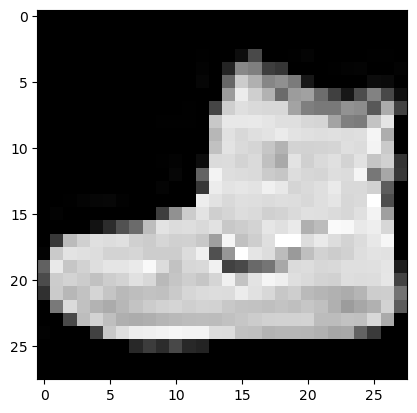

In [475]:
plt.imshow(X_train[0], cmap="gray")


In [477]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

#### scaling the values of the pixels in X_train and X_test 

In [479]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [481]:
y_train[0]

9

#### data prepation for the neural network to get trained

#### in this traning and testing i kept the learning rate at 0.01

In [496]:
y_train_encoded = one_hot_encode(y_train , 10)
y_test_encode = one_hot_encode(y_test , 10)

X_train_scaled = X_train_scaled.reshape(-1, 784)
X_test_scaled = X_test_scaled.reshape(-1, 784)

nn_fashion = MyNN(input_layer=784, hidden_layer=128, output_layer=10, learning_rate=0.01)
print("Training neural network...")
start_time = time.time()
nn_fashion.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=128)
print(f"Training completed in {time.time() - start_time:.2f} seconds")

# Evaluate on test set
print("Evaluating on test set...")
nn_fashion.evaluate(X_test_scaled, y_test_encoded)

Training neural network...
Epoch 10/100, Loss: 1.8349, Train Accuracy: 0.8353
Epoch 20/100, Loss: 1.2132, Train Accuracy: 0.8428
Epoch 30/100, Loss: 0.9720, Train Accuracy: 0.8460
Epoch 40/100, Loss: 0.8776, Train Accuracy: 0.8474
Epoch 50/100, Loss: 0.8401, Train Accuracy: 0.8481
Epoch 60/100, Loss: 0.8250, Train Accuracy: 0.8490
Epoch 70/100, Loss: 0.8186, Train Accuracy: 0.8494
Epoch 80/100, Loss: 0.8157, Train Accuracy: 0.8499
Epoch 90/100, Loss: 0.8141, Train Accuracy: 0.8503
Epoch 100/100, Loss: 0.8132, Train Accuracy: 0.8509
Training completed in 97.69 seconds
Evaluating on test set...
Accuracy: 0.8367


0.8367

##### the Accuracy of the model on the testing set is very good beacuse i didn't apply any changes the same neural network

##### i changed the learning rate to 0.005 i got basically the same accuracy

In [493]:
y_train_encoded = one_hot_encode(y_train , 10)
y_test_encode = one_hot_encode(y_test , 10)

X_train_scaled = X_train_scaled.reshape(-1, 784)
X_test_scaled = X_test_scaled.reshape(-1, 784)

nn_fashion = MyNN(input_layer=784, hidden_layer=128, output_layer=10, learning_rate=0.005)
print("Training neural network...")
start_time = time.time()
nn_fashion.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=128)
print(f"Training completed in {time.time() - start_time:.2f} seconds")

# Evaluate on test set
print("Evaluating on test set...")
nn_fashion.evaluate(X_test_scaled, y_test_encoded)

Training neural network...
Epoch 10/100, Loss: 2.4687, Train Accuracy: 0.8198
Epoch 20/100, Loss: 1.8400, Train Accuracy: 0.8346
Epoch 30/100, Loss: 1.4543, Train Accuracy: 0.8401
Epoch 40/100, Loss: 1.2147, Train Accuracy: 0.8433
Epoch 50/100, Loss: 1.0654, Train Accuracy: 0.8446
Epoch 60/100, Loss: 0.9722, Train Accuracy: 0.8458
Epoch 70/100, Loss: 0.9140, Train Accuracy: 0.8465
Epoch 80/100, Loss: 0.8774, Train Accuracy: 0.8471
Epoch 90/100, Loss: 0.8544, Train Accuracy: 0.8478
Epoch 100/100, Loss: 0.8398, Train Accuracy: 0.8483
Training completed in 105.72 seconds
Evaluating on test set...
Accuracy: 0.8351


0.8351